In [1]:


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
G = nx.Graph()

def add_node(n):
    for i in range(int(n)):
        G.add_node(i)
    return G


#now we add random edges with p

def add_edges(n,p):
    for i in G.nodes():
        for j in G.nodes():
            a = random.random()
            if i < j and a < p:
                G.add_edge(i,j)
    return G

def gen_random_graph(n,p):
    add_node(n)
    add_edges(n,p)
    #count number of triangles in the graph
    triangles = nx.triangles(G)
    #num trinangles is the sum of all triangles
    num_triangles = sum(triangles.values())/3
    return G, num_triangles



n = 5
p = 3/(n-1)
gen_random_graph(n,p)
#define colour of each node dependen on number of edges
color_map = []
colors = ["red", "blue", "green", "yellow", "orange", "purple", "pink", "black", "grey", "brown"]
#draw graph with nodes having colours
#create a functions that removes a random notes and all edges connected to it

def remove_node(G):
    a = random.choice(list(G.nodes()))
    G.remove_node(a)
    return G
#Finding the biggest cluster in the graph
def find_biggest_cluster(G):
    clusters = list(nx.connected_components(G))
    biggest_cluster = max(clusters, key = len)
    return biggest_cluster


def draw_graph(G):
        
    labels = {}
    node_size = []
    for i in G.nodes():
        labels[i] = len(G[i])
        node_size.append(len(G[i])*100)
        color_map.append(colors[len(G[i])])
    
    nx.draw(G, node_color = color_map, with_labels = True, labels = labels, font_colfinr = "white", font_weight = "bold", font_size = 12, node_size = node_size)
    plt.title("Random Graph with "+str(n)+" nodes and p = "+str(p))
    plt.show()






In [4]:
triangles = nx.triangles(G)
triangles
print(triangles)
#num trinangles is the sum of all triangles
num_triangles = sum(triangles.values())/3   
num_triangles

{0: 5, 1: 5, 2: 3, 3: 3, 4: 5}


7.0

In [9]:
n = [10, 100, 1000]

avr_triangles = []
for i in n:
    print(i)
    p = 3/(i-1)
    triangles = []
    for j in range(1000):
        if j % 100 == 0:
            print(j)
        G = nx.Graph()
        gen_random_graph(i,p)
        triangles_val = nx.triangles(G)
        num_triangles = sum(triangles_val.values())/3
        triangles.append(num_triangles)
    avr_triangles.append(np.mean(triangles))

   
    
            
        

10
0
100
200
300
400
500
600
700
800
900
100
0
100
200
300
400
500
600
700
800
900
1000
0
100
200
300
400
500
600
700
800
900


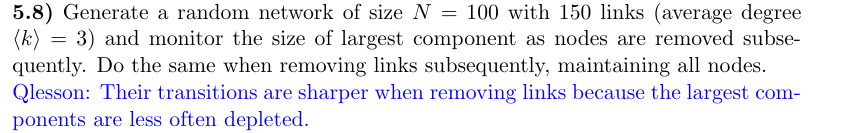

In [28]:
#now we remove a node one by one one and see how the biggest cluster change in size
n = 1000
p = 3/(n-1)
G = nx.Graph() 
num_edges = []
k_exp = []
gen_random_graph(n,p)
biggest_cluster = []
n_nodes = []
for i in range(n-1):
    if i % 10 == 0:
        print(i)
    biggest_cluster.append(len(find_biggest_cluster(G)))
    edges = len(G.edges())
    num_edges.append(edges)
    k = 2*edges/n
    k_exp.append(k)
    remove_node(G)
    
    n_nodes.append(150 - i -1)
    


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


Text(0.5, 1.0, 'Size of biggest cluster as a function of nodes removed')

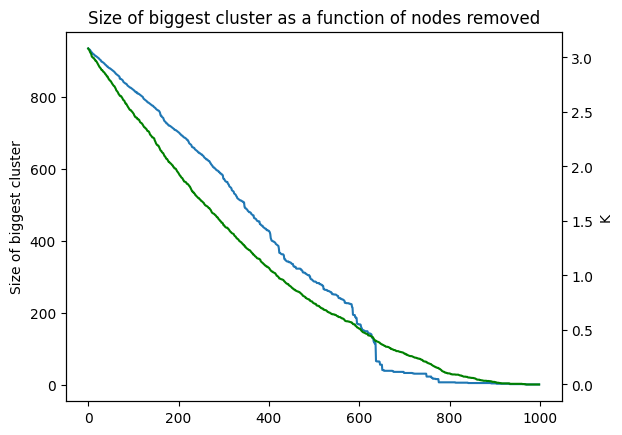

: 

In [29]:
#plot biggest cluster size as a function of nodes removed
plt.plot(biggest_cluster)
plt.ylabel("Size of biggest cluster")
#set twin y axis
plt.twinx()
#plt.plot(n_nodes, num_edges, "r", label = "Number of edges")
plt.plot(k_exp, "g", label = "K")
plt.xlabel("Number of nodes removed")
plt.ylabel("K")

plt.title("Size of biggest cluster as a function of nodes removed")
 

In [17]:
#lets build a network from scratch without using networkx library, but manually 
#we will use an adjacency matrix to represent the graph. for the the graph we want to make the choice of being bideirectional 


n_edges = 5 
def make_graph(n, bidectional = True):
    A = np.zeros((n,n))
    for i in range(n): 
        a = random.choice(range(n))
        b = random.choice(range(n))
        #we want to make sure that we dont add an edge to the same node
        if a == b:
            b = (b+1) % 5
        if bidectional == True:
            A[a,b] = 1
            A[b,a] = 1
        else:
            A[a,b] = 1
    return A   

#now we want to add an extra layer of complexity to the graph by adding 
#weights to the edges and we want to be a function of weights already on the nodes
         
def desired_weights(x):
    a = int(x)
    if a < 7.5:
        weights = np.ones(a)
        return weights
    if a > 7.5 and a < 13.5:
        #we set 7 first = 1, and then the rest to 0.5
        first_seven = np.ones(7)
        rest = np.ones(a-7)*np.random.random(a-7)*0.5
        #now we want to combine the two arrays
        weights = np.concatenate((first_seven, rest))
        #shuffle the array
        weights = np.random.shuffle(weights)
        return weights
        
    if a > 13.5:
        #we set 7 first = 1, and then the rest to 0.5
        first_seven = np.ones(7)
        seventofourteen= np.ones(6)*np.random.random(6)*0.5
        rest = np.ones(a-13)*np.random.random(a-13)*0.25
        #now we want to combine the two arrays
        weights = np.concatenate((first_seven, rest))
        weights = np.concatenate((weights, seventofourteen))
        #shuffle the array
        weights = np.random.shuffle(weights)
        return weights
#bidirectional graph and weights and directional 
def add_weights(A, bidirectional = True):
    #biderctional graph can be speeded up by not looping over all nodes,  but is option for later. 
        n_nodes = len(A[0]) 
        for i in range(n_nodes):
            #count number of edges connected to node i
            k = A[i,:]
            k_sum = sum(A[i,:])
            weights = desired_weights(k_sum)
            for j in range(len(k)):
                if k[j] == 1:
                    A[i,j] = weights[j]
                    
        #make matrix symetric    
        if bidirectional == True:
            A = np.transpose(A)
            A = A + np.transpose(A)
        return A
    
#now we want different functions which makes measurements on the graph. one is the clustering coeffecient
def clustering_coefficient(A):
    n_nodes = len(A[0])
    clustering_coeff = []
    for i in range(n_nodes):
        #find all nodes connected to node i
        connected_nodes = np.where(A[i] == 1)[0]
        #find all edges between connected nodes
        edges = 0
        for j in connected_nodes:
            for k in connected_nodes:
                if A[j,k] == 1:
                    edges += 1
        #clustering coefficient is the number of edges between connected nodes divided by the number of possible edges
        clustering_coeff.append(edges/(len(connected_nodes)*(len(connected_nodes)-1)))
    return clustering_coeff

def average_clustering_coefficient(A):
    clustering_coeff = clustering_coefficient(A)
    return np.mean(clustering_coeff)


#now we want to make a function that finds the shortest path between two nodes. 


def dijkstra(A, source):
    # Number of nodes
    n_nodes = A.shape[0]

    # Initialize distances from the source node to all others with infinity
    dist = torch.full((n_nodes,), float('inf'))
    dist[source] = 0  # Distance to source is 0

    # Boolean list to mark visited nodes
    visited = torch.zeros(n_nodes, dtype=torch.bool)

    # Loop to find shortest path for all nodes
    for _ in range(n_nodes):
        # Pick the unvisited node with the smallest distance
        min_dist = float('inf')
        u = -1
        for i in range(n_nodes):
            if not visited[i] and dist[i] < min_dist:
                min_dist = dist[i]
                u = i
        
        # Mark the node as visited
        visited[u] = True

        # Update the distance for the neighbors of u
        for v in range(n_nodes):
            if A[u, v] > 0 and not visited[v]:  # Check if there's an edge
                if dist[u] + A[u, v] < dist[v]:
                    dist[v] = dist[u] + A[u, v]

    return dist





    


    

        

In [18]:
#
A = make_graph(5)
A = add_weights(A)

#meassure clustering coeffecient
clustering_coeff = clustering_coefficient(A)
#meassure average clustering coeffecient
average_clustering_coefficient(A)
#meassure shortest path
dijkstra(A, 0)


    


IndexError: index 1 is out of bounds for axis 0 with size 1

In [8]:
np.random.random(5)*0.5

array([0.12440002, 0.48083799, 0.19538743, 0.41925127, 0.27476913])